### Question 1 Decision Trees (40 points)
For the first two problems, it would be helpful for you to draw the decision boundary of your learned
tree in the figure.

* Consider the problem of predicting if a person has a college degree based on age and salary. The table and graph below contain training data for 10 individuals. Now build a decision tree for classifying whether a person has a college degree by greedily choosing threshold splits that maximize information
gain. What is the depth of your tree and the information gain at each split?

* A multivariate decision tree is a generalization of univariate decision trees, where more than one attribute can be used in the decision rule for each split. That is, splits need not be orthogonal to a feature’s axis.

 For the same data, learn a multivariate decision tree where each decision rule is a linear classifier that
makes decisions based on the sign of αxage + βxincome −1. Draw your tree, including the α,β and the
information gain for each split.

* Multivariate decision tres have practical advantages and disadvantage. List advantages and disadvan-
tages you can think of when comparing multivariate decision trees to univariate decision trees.


In [16]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("dt.csv")

In [6]:
df.head(10)

,age,salary,collegedegree
0,24,40000,1
1,53,52000,0
2,23,25000,0
3,25,77000,1
4,32,48000,1
5,52,110000,1
6,22,38000,1
7,43,44000,0
8,52,27000,0
9,48,6500,1


In [7]:
x = df[['age', 'salary']].values
y = df["collegedegree"]
labels = y.unique()
#split the dataset
X_train, test_x, y_train, test_lab = train_test_split(x,y,
                                                 test_size = 0.3,
                                                 random_state = 42)

In [8]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

In [17]:
clf.fit(x, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 37.50
|   |--- feature_1 <= 31500.00
|   |   |--- class: 0
|   |--- feature_1 >  31500.00
|   |   |--- class: 1
|--- feature_0 >  37.50
|   |--- feature_1 <= 16750.00
|   |   |--- class: 1
|   |--- feature_1 >  16750.00
|   |   |--- feature_1 <= 81000.00
|   |   |   |--- class: 0
|   |   |--- feature_1 >  81000.00
|   |   |   |--- class: 1



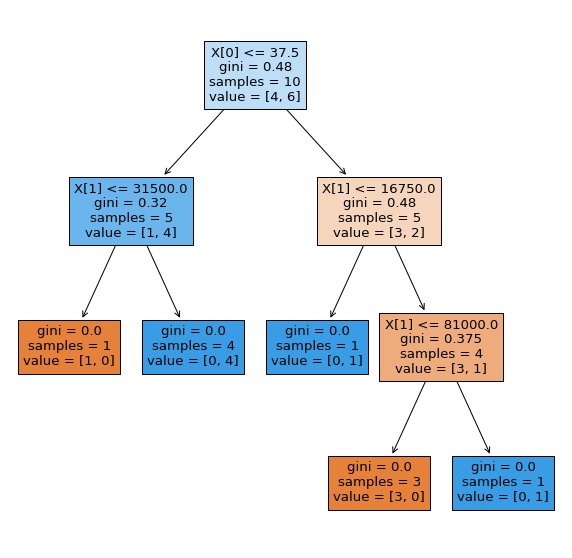

In [20]:
image = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, 
                   filled=True)